<br>

---


<br>
<font size='6'><u><b>Lentes Gravitatorios</b></u></font>
<br>

Has aprendido a medir la masa de una galaxia basándote en el efecto de lentes gravitatorios, producido por una galaxia en primer plano. Este efecto de lente se puede ver en las diversas imágenes de abajo. En esta actividad, revisaremos algunos de los pasos que utilizan los astrónomos y astrónomas para determinar la masa de una galaxia mediante el análisis del efecto de lente.

<img src='https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/e-TeenAstronomyCafe/05_Gravitational_Lensing/Figures/SloanLensACS_Survey.png?raw=1' width='900'>

___

# Tabla de Contenidos

* [Cómo usar esta Guía](#How-to-Use-This-Notebook)
* [Configuración Previa a la Actividad](#Pre-Activity-Setup)
* [Actividad 1: La Galaxia Amplificada](#Activity-1:-The-Lensed-Galaxy)
* [Actividad 2: La Galaxia Lente](#Activity-2:-The-Lensing-Galaxy)
* [Actividad 3: La Galaxia Lente y Amplificada](#Activity-3:-The-Lensed-and-Lensing-Galaxies)
    * [Parte 3.1: Haciendo coincidir las Galaxias](#Part-3.1:-Matching-the-Galaxy)
    * [Parte 3.2: Galaxias Reales Amplificadas](#Part-3.2:-Real-Lensed-Galaxies)
    * [Parte 3.3: Relación con la Masa de las Galaxias](#Part-3.3:-Relation-to-the-Mass-of-Galaxies)
___

## Cómo usar esta Guía

La página web en la que te encuentras es en realidad una aplicación llamada Jupyter Notebook, muy parecida a las de tu teléfono. Esta aplicación contiene celdas.

Una celda de *entrada/input* parece un cuadro gris claro con un `In [ ] ` a su izquierda. Cada una de las celdas de entrada contiene códigos: instrucciones para hacer que el computador haga algo.

Para activar o seleccionar una celda, haz clic en cualquier lugar dentro de ella.

<div class='alert alert-info'>
    <font size='3'><b>Selecciona la celda de abajo y lee su contenido.</b></font>
</div>

In [ ]:
# El texto que sigue a un "#" es un comentario.
# Los comentarios no afectan su código de ninguna manera.
# Lea siempre los comentarios en la parte superior de cada celda con la que interactúe.
# Los comentarios se utilizarán para describir lo que realmente está haciendo el código de la celda.

Para ejecutar una celda seleccionada, haz clic en el pequeño botón de reproducción o presiona `[Shift + Enter]` en tu teclado.


\\
<div class='alert alert-info'>
    <font size='3'><b>Selecciona la celda de abajo y lee su contenido. Luego, ejecuta la celda.</b></font>
        <br> Si aparece una advertencia, simplemente haz clic en <em>"Ejecutar de todos modos"</em>, este código es seguro 😉
        <br> Además, si deseas guardar tu progreso, haz clic en el botón <em>"Guardar una copia en Drive"</em> en la parte superior.
      </div>

In [ ]:
# El texto que NO está antecedido por un "#" se considera código.
# Las líneas de código son instrucciones dadas a tu computador.
# La línea de código de abajo es una instrucción de "impresión" (print), que literalmente imprime el texto entre comillas.

print("¡Felicitaciones! ¡Has ejecutado con éxito tu primera celda!")

Ejecutar una celda crea una *salida/output* directamente debajo de ella. Una salida puede ser un texto, un gráfico, un control deslizante interactivo, ¡o incluso nada en absoluto! Cuando has ejecutado una celda, aparece un número entre corchetes, por ejemplo [1] al lado izquierdo de la celda.

<div class='alert alert-info'>
    <font size='3'><b>Abre todas las secciones de este bloc de notas seleccionando el menú "Ver" y "Expandir secciones" </b></font>
        <br>
</div>


Puedes obtener más información sobre cómo funcionan los Jupyter Notebooks en https://try.jupyter.org/ (página en inglés)
___

# Configuración Previa a la Actividad

Para que cualquiera de las actividades funcione correctamente, debes importar las bibliotecas necesarias para el funcionamiento del código de esta guía. Estos ya deberían haberse cargado cuando ejecutaste todas las celdas.

<div class='alert alert-info'>
    <font size='3'><b>Selecciona y ejecuta la celda a continuación.</b></font>
</div>

In [ ]:
# Ahora importamos algunos paquetes necesarios de nuestro repositorio

repoURL = 'https://raw.githubusercontent.com/marcodatadev/notebooks-latest/blob/feature/Fspanish-tanslation/06_EPO/e-TeenAstronomyCafe/'

from httpimport import remote_repo

with remote_repo(repoURL+'05_Gravitational_Lensing') :
    import lensdemo_funcs as ldf

In [ ]:
# Importar los módulos necesarios.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import cm
from ipywidgets import *
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

print('¡Listo! Has importado correctamente las bibliotecas.')

### Nota al margen de programación

Las celdas anteriores son una forma de importar las funciones necesarias y otras cosas que nos permiten hacer dibujos y operaciones matemáticas con mucha facilidad. En la siguiente celda, usaremos un diccionario para agrupar cosas fácilmente. Así como en un diccionario normal hay una palabra y una definición, este diccionario actúa de manera similar pero en lugar de una palabra, lo llamamos clave y en lugar de una definición lo llamamos valor.


```python
dictionary = {key1 : value1, key2 : value2 ...}
```

In [ ]:
#Defina algunas preferencias de visualización de imágenes en un "objeto de diccionario", para usar durante la actividad:
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.nipy_spectral}
# La siguiente línea de comando especifica un mapa de color alternativo, que algunos pueden encontrar más cómodo para trabajar.
# Descomente y ejecute la siguiente línea si desea usarla:
#myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.hot}

___

# Actividad 1: La Galaxia *Amplificada*

---



En este ejercicio jugarás con los diferentes parámetros de una galaxia lejana; llamaremos a esta galaxia Pat. Esta será la galaxia que pasará por el efecto de lente gravitacional y con la que trabajaremos durante esta actividad. ¿Cómo esperarías que se viera una galaxia muy distante? ¿Tendría forma de espiral? ¿Un punto? ¿Algún tipo de mancha? Piensa al respecto y luego conversa con una persona que esté cerca tuyo.

Una vez que lo hayas analizado, comenzaremos a configurar algunos de los parámetros de más abajo para obtener una imagen de cómo se verá Pat. Primero, ejecuta el programa tal como está configurado. Luego, usa los controles deslizantes para ajustar los parámetros hasta que Pat tenga el aspecto que desees. Nuestra recomendación es ajustar un parámetro a la vez (por ejemplo: `g_sig`, `g_amp`, `g_axrat`, etc.)  para ver cómo ese parámetro cambia a Pat. Intenta esto unas cuantas veces. Habla con la persona que esté a tu lado y describe una o dos formas en las que Pat se ve diferente.


```python
gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]
```

Donde los parámetros se definen como:

>`g_amp` es el valor máximo de brillo.  
>`g_sig` es cómo se extiende Pat.  
>`g_xcen` es la posición "x" del centro de Pat.  
>`g_ycen` es la posición "y" del centro de Pat.  
>`g_axrat` es la razón entre el eje menor y el eje mayor.  
>`g_pa` es el ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x.

A continuación cada uno de los parámetros tiene los siguientes rangos de valores recomendados:

>$0 \le$ `g_amp` $\le 10$  
>$0 \le$ `g_sig` $\le 0.5$  
>$-1 \le$ `g_xcen` $\le 1$  
>$-1 \le$ `g_ycen` $\le 1$  
>$0.01 \le$ `g_axrat` $\le 1$  
>$0 \le$ `g_pa` $\le 180$

<div class='alert alert-info'>
    <h3 class='alert-heading'>Recordatorio(s) útil(es)</h3>
    <ul>
        <li>Haz clic en cualquier lugar dentro de una celda para seleccionarla.</li>
        <li>Presiona [Shift + Enter] para ejecutar una celda seleccionada.</li>
    </ul>
</div>

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='g_amp', layout=Layout(width…

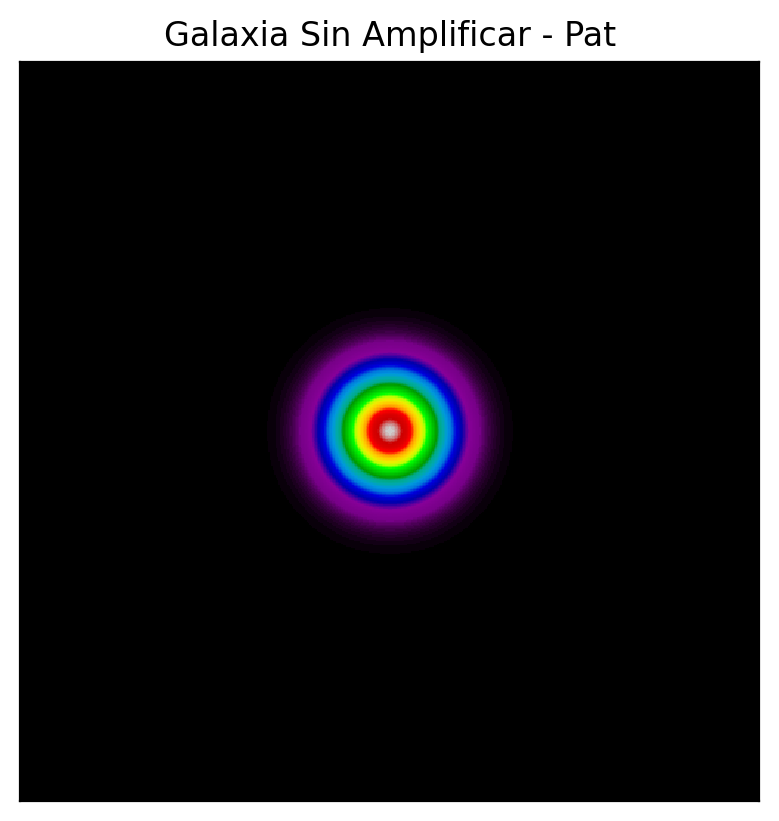

In [ ]:
# Establece algunos parámetros para hacer imágenes de coordenadas x e y.
nx = 501
ny = 501
xhilo = [-2.5, 2.5]
yhilo = [-2.5, 2.5]
x = (xhilo[1] - xhilo[0]) * np.outer(np.ones(ny), np.arange(nx)) / float(nx-1) + xhilo[0]
y = (yhilo[1] - yhilo[0]) * np.outer(np.arange(ny), np.ones(nx)) / float(ny-1) + yhilo[0]

# Establece algunos parámetros de imagen de Pat y colócalos en una matriz.
g_amp = 5  # Valor máximo de brillo
g_sig = 0.25  # cómo se extiende Pat
g_xcen = 0  # Posición x del centro
g_ycen = 0  # Posición y del centro
g_axrat = 1  #  razón entre el eje menor y mayor
g_pa = 0  # ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x
gpar = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
g_image = ldf.gauss_2d(x, y, gpar)

# Echa un vistazo a Pat sin Amplificar.
# Crea un widget interactivo.
def f(g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Galaxia Sin Amplificar - Pat')
    ax.set_xticks([])
    ax.set_yticks([])
    gpar = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
    g_image = ldf.gauss_2d(x, y, gpar)
    plt.imshow(g_image, **myargs)

layout = {'width':'initial'}
box_layout = {'display':'flex', 'flex_flow':'column', 'align-items':'center', 'border':'1px solid grey', 'width':'initial'}
g_amp = FloatSlider(value=5, min=0, max=10, step=0.01, continuous_update=False, layout=layout)
g_sig = FloatSlider(value=0.25, min=0, max=0.5, step=0.01, continuous_update=False, layout=layout)
g_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
g_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
plot1 = interactive(f, g_amp=g_amp, g_sig=g_sig, g_xcen=g_xcen, g_ycen=g_ycen, g_axrat=g_axrat, g_pa=g_pa)
plot1.layout = box_layout
display(plot1)

___

# Actividad 2: La Galaxia *Lente*

Ahora que tenemos a Pat, es hora de agregar una galaxia más cercana y masiva; que llamaremos Chris. Los científicos llaman a Chris la galaxia *Lente* y a Pat la galaxia *Amplificada*. El parámetro más importante para Chris es el *Radio de Einstein* (definición en la parte 3.3 de esta guía). Conocer este parámetro permite a los científicos predecir la masa de Chris, la galaxia lente. Usaremos a Pat como nuestra galaxia distante y ajustaremos los parámetros de Chris para ver cómo cada uno de los parámetros cambia la apariencia de Pat para nosotros. Primero, ejecuta el programa tal como está configurado. Luego, usa los controles deslizantes para ajustar un parámetro a la vez (por ejemplo: `l_amp`, `l_axrat`, etc.) para ver cómo cambia ese parámetro en Pat. Intenta esto unas cuantas veces. Habla con la persona que está a tu lado y describe una o dos formas en las que Pat se ve diferente.

```python
lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]
```

Donde los parámetros se definen como:

>`l_amp` es el radio de Einstein de Chris.  
>`l_xcen` es la posición "x" del centro de Chris.  
>`l_ycen` es la posición "y" del centro de Chris.  
>`l_axrat` es la razón entre el eje menor y el mayor.  
>`l_pa` es el ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x.

A continuación cada uno de los parámetros tiene los siguientes rangos de valores recomendados:

>$0 \le$ `l_amp` $\le 2$  
>$-1 \le$ `l_xcen` $\le 1$  
>$-1 \le$ `l_ycen` $\le 1$  
>$0.01 \le$ `l_axrat` $\le 1$  
>$0 \le$ `l_pa` $\le 180$

<div class='alert alert-info'>
    <h3 class='alert-heading'>Recordatorio(s) útil(es)</h3>
    <ul>
        <li>Haz clic en cualquier lugar dentro de una celda para seleccionarla.</li>
        <li>Presiona [Shift + Enter] para ejecutar una celda seleccionada.</li>
    </ul>
</div>

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='l_amp', layout=Layout(width…

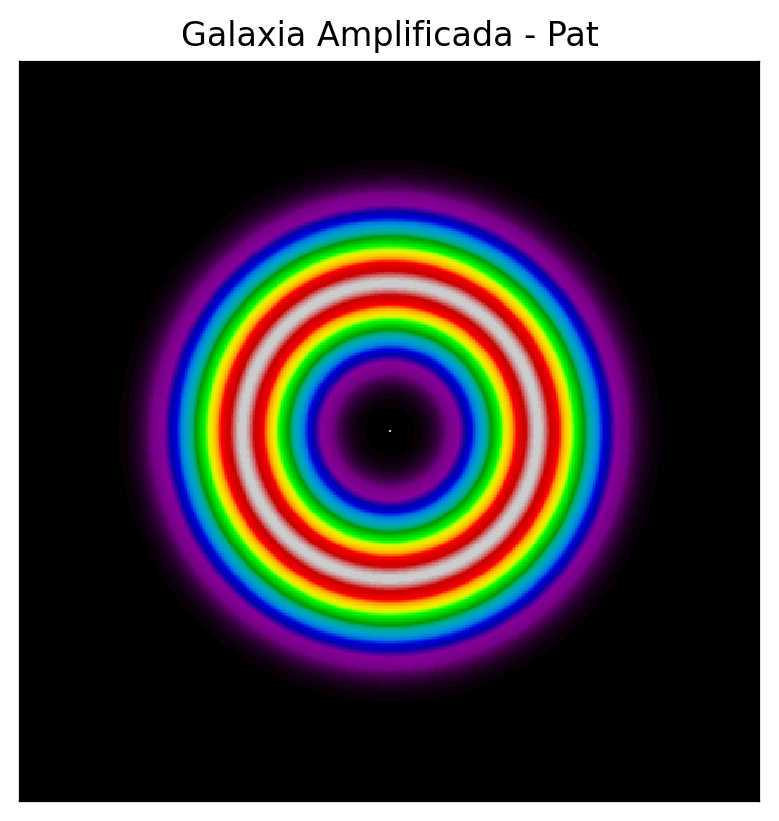

In [ ]:
# Establece los parámetros del modelo de lente y agrégalos en una matriz.
l_amp = 1  # Radio de Einstein
l_xcen = 0  # Posición x del centro de Chris
l_ycen = 0  # Posición y del centro de Chris
l_axrat = 1  # Razón entre el eje menor y el mayor
l_pa = 0  # ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x
lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
(xg, yg) = ldf.sie_grad(x, y, lpar)
g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)

# Echa un vistazo a la lente de Pat.
# Crea el widget interactivo.
def f(l_amp, l_xcen, l_ycen, l_axrat, l_pa):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Galaxia Amplificada - Pat')
    ax.set_xticks([])
    ax.set_yticks([])
    lpar = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
    (xg, yg) = ldf.sie_grad(x, y, lpar)
    g_lensimage = ldf.gauss_2d(x-xg, y-yg, gpar)
    plt.imshow(g_lensimage, **myargs)

l_amp = FloatSlider(value=1, min=0, max=2, step=0.01, continuous_update=False, layout=layout)
l_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
l_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
plot2 = interactive(f, l_amp=l_amp, l_xcen=l_xcen, l_ycen=l_ycen, l_axrat=l_axrat, l_pa=l_pa)
plot2.layout = box_layout
display(plot2)

___

# Actividad 3: La Galaxia Amplificada y la Galaxia Lente
<img src="https://github.com/marcodatadev/notebooks-latest/blob/feature/spanish-tanslation/06_EPO/e-TeenAstronomyCafe/05_Gravitational_Lensing/Figures/Lensed_Galaxy_Compnents%20_V2-es.jpg?raw=1" width="800">

Ahora que hemos modificado los parámetros de Pat y Chris individualmente, ¿qué sucede si cambiamos los parámetros de ambos al mismo tiempo? En las siguientes celdas, la imagen de la izquierda es Pat antes de que se haya "amplificado" y la imagen de la derecha es Pat después de que Chris desvió su luz y, por lo tanto, está "amplificado". **Es importante señalar que en las próximas imágenes no mostramos a Chris, sólo de mostraremos a Pat.**

\\

___

## Parte 3.1:  Haciendo coincidir las Galaxias

Usando los controles deslizantes de abajo, intenta reproducir tantas imágenes como puedas, registrando todos los parámetros y sus valores para cada imagen que puedas reproducir (los nombres de los parámetros están a la izquierda de los controles deslizantes y los valores están a la derecha de los deslizadores).

Para tu comodidad, te recordamos nuevamente los parámetros:



```python
gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]
```

Donde los parámetros de Pat se definen como :

>`g_amp` es el valor de brillo máximo.  
>`g_sig` es cómo se extiende Pat.  
>`g_xcen` es la posición x del centro de Pat.   
>`g_ycen` es la posición y del centro de Pat.  
>`g_axrat` es la razón entre el eje menor y el mayor.  
>`g_pa` es el ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x.

```python
lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]
```

Donde los parámetros de Chris se definen como:

>`l_amp` es el radio de Einstein de Chris.  
>`l_xcen` es la posición x del centro de Chris.  
>`l_ycen` es la posición y del centro de Chris.  
>`l_axrat` es la razón entre el eje menor y el mayor.  
>`l_pa` es el ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x.


Como pista, todos tienen el mismo `l_amp` $= 1.5$, `l_xcen` $= 0$, `l_ycen` $= 0$, `l_pa` $= 0$, pero tienen diferente `l_axrat` entre $0.01$ y $1$. Finalmente, el rango de valores para Pat (la galaxia distante, sin amplificar) viene dado por:

>$0 \le$ `g_amp` $\le 10$  
>$0 \le$ `g_sig` $\le 0.5$  
>$-1 \le$ `g_xcen` $\le 1$  
>$-1 \le$ `g_ycen` $\le 1$  
>$0.01 \le$ `g_axrat` $\le 1$  
>$0 \le$ `g_pa` $\le 180$

<img src='https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/e-TeenAstronomyCafe/05_Gravitational_Lensing/Figures/lens_image_mosaic_v2.png?raw=1'>

<div class='alert alert-info'>
    <h3 class='alert-heading'>Recordatorio(s) útil(es)</h3>
    <ul>
        <li>Haz clic en cualquier lugar dentro de una celda para seleccionarla.</li>
        <li>Presiona [Shift + Enter] para ejecutar una celda seleccionada.</li>
    </ul>
</div>

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='g_amp', layout=Layout(width…

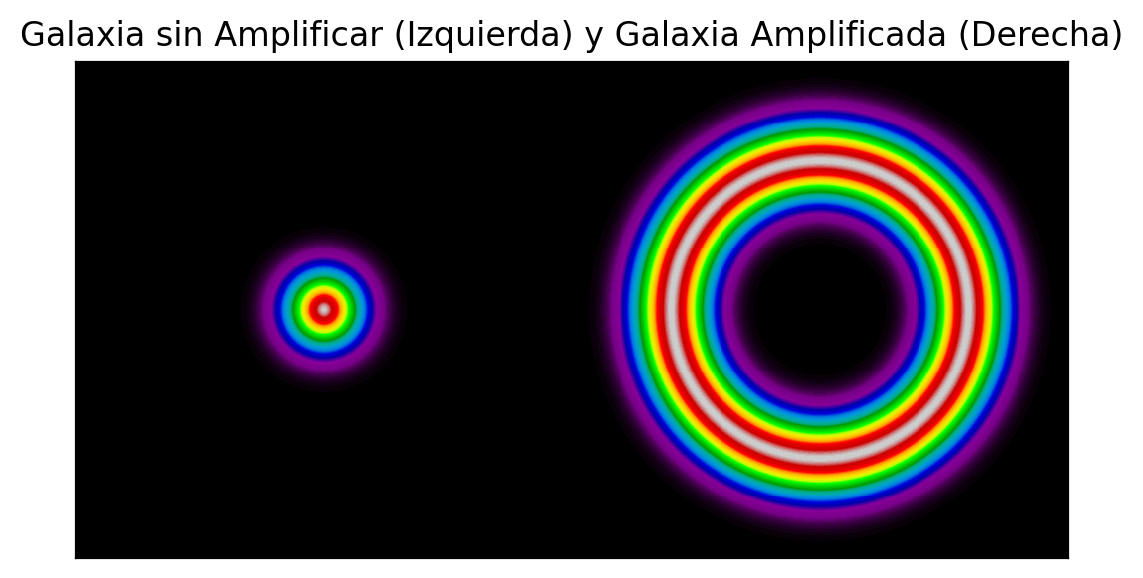

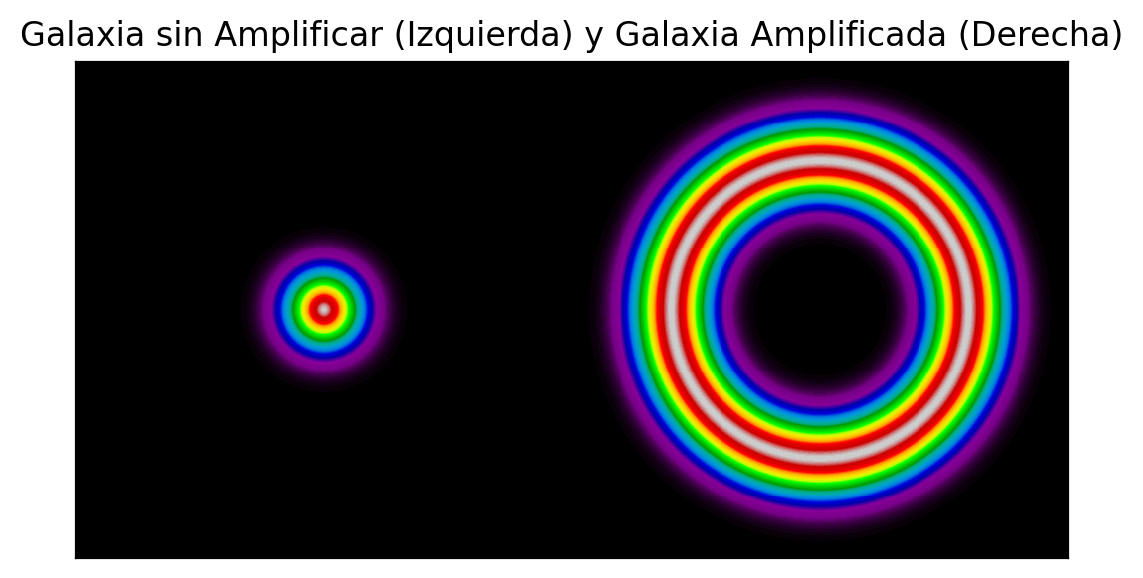

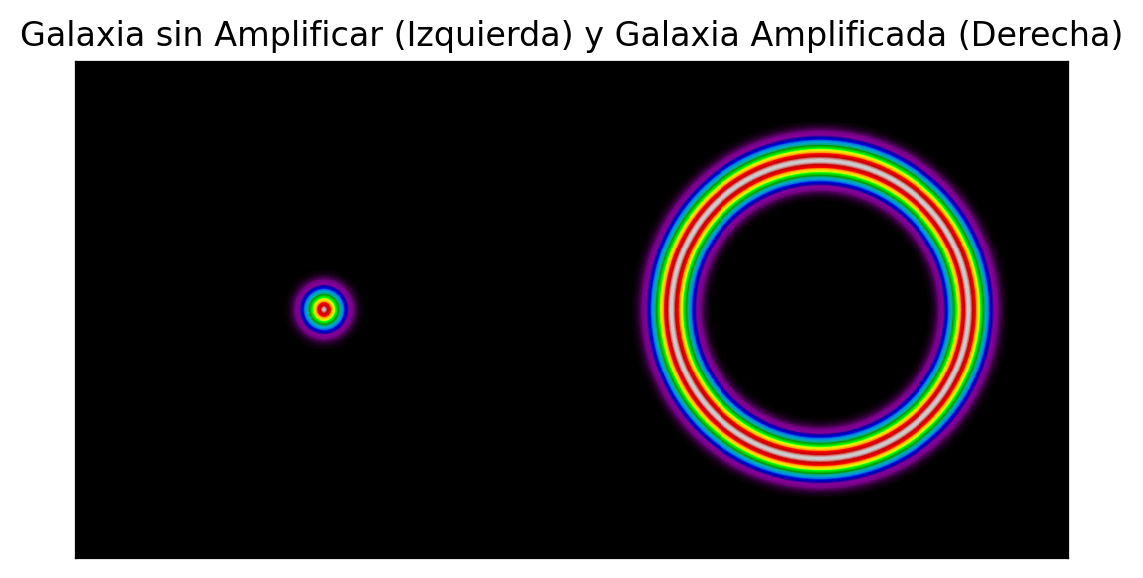

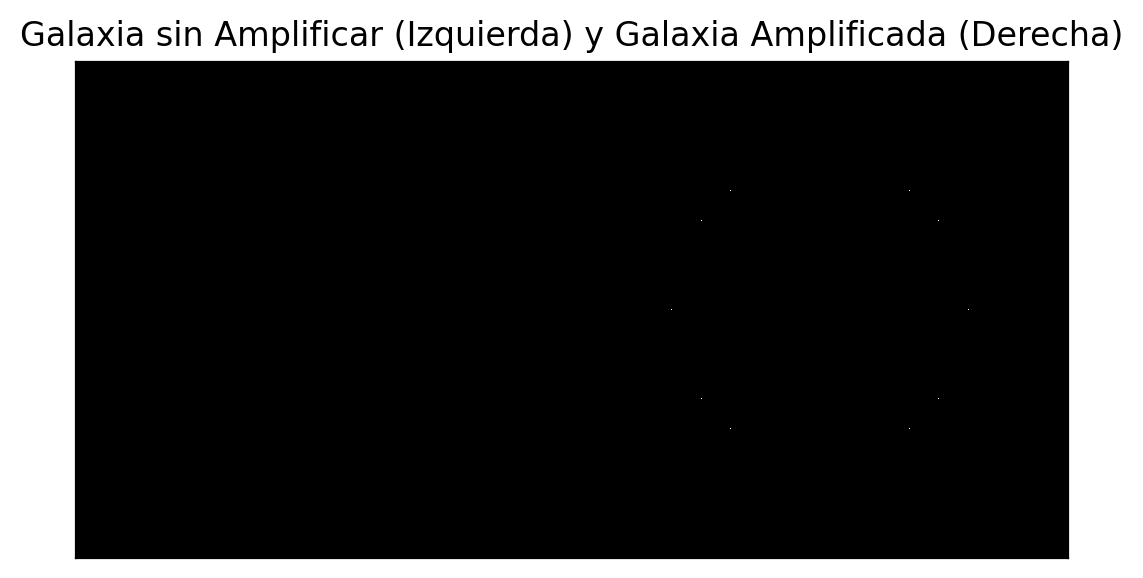

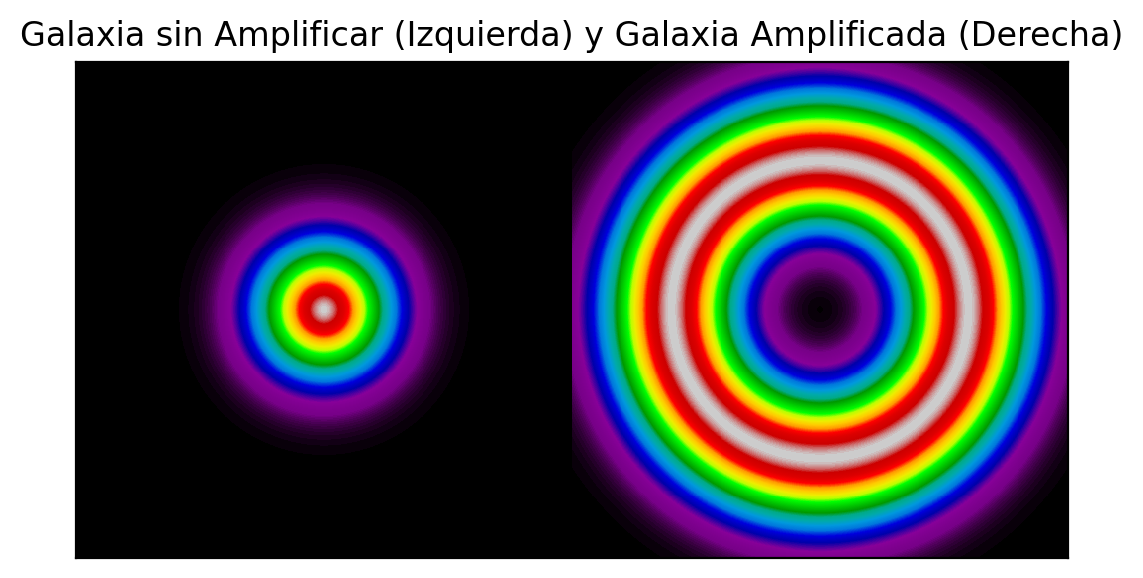

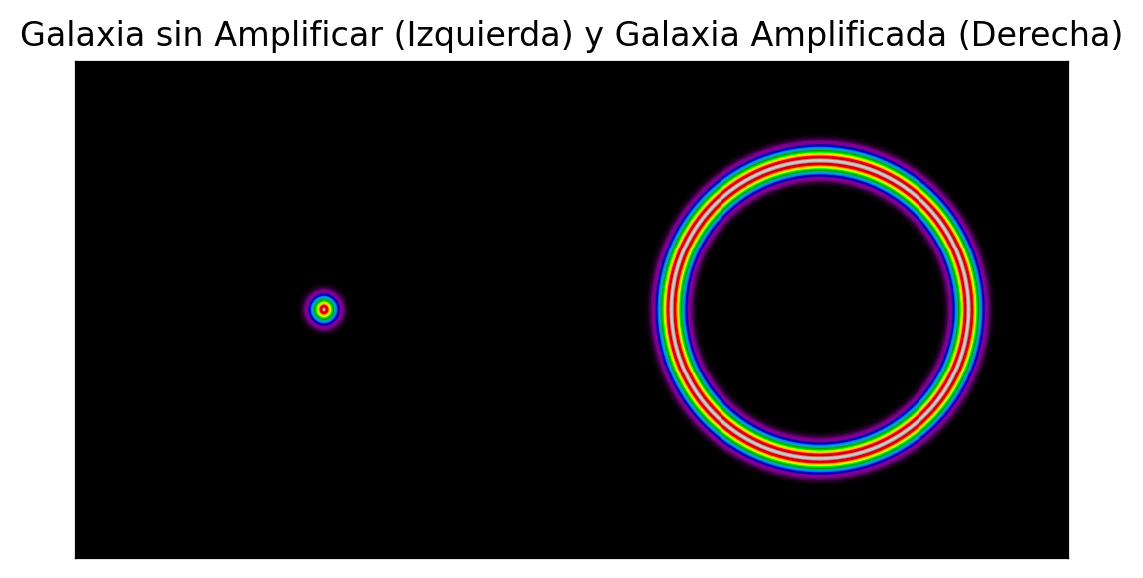

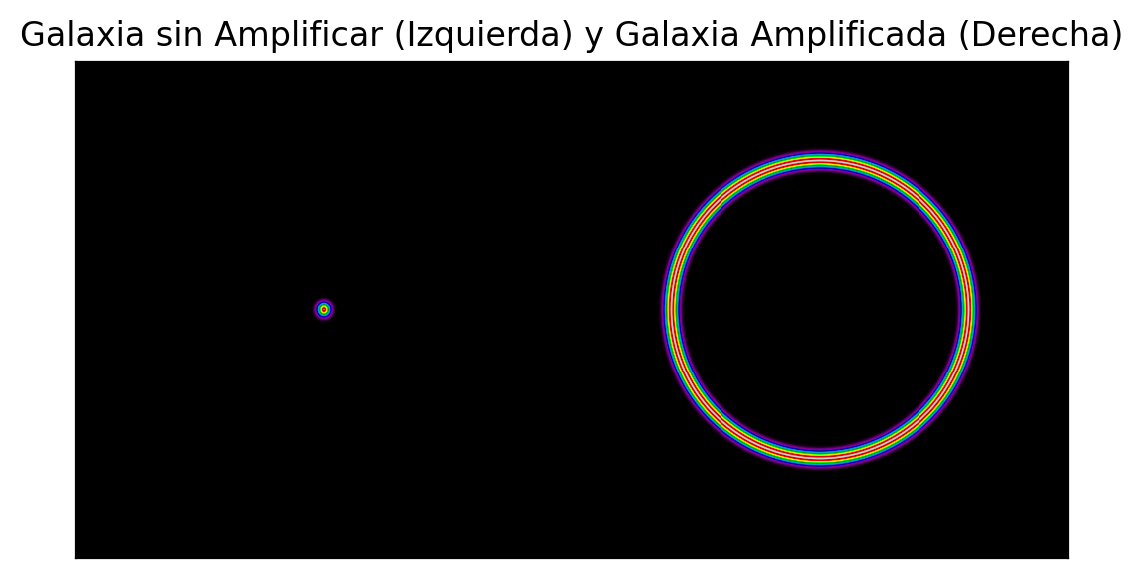

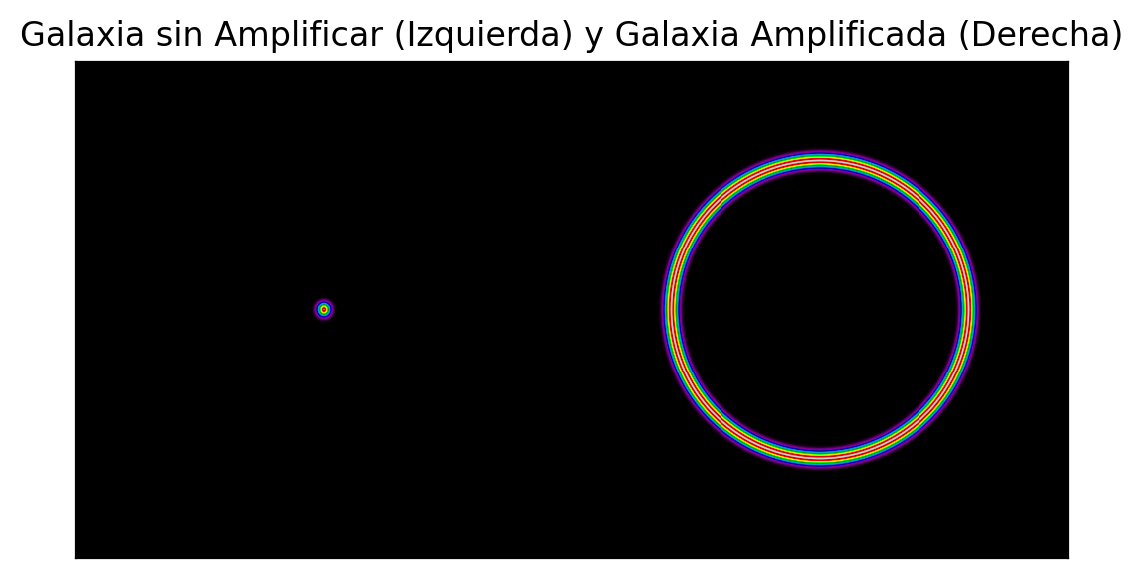

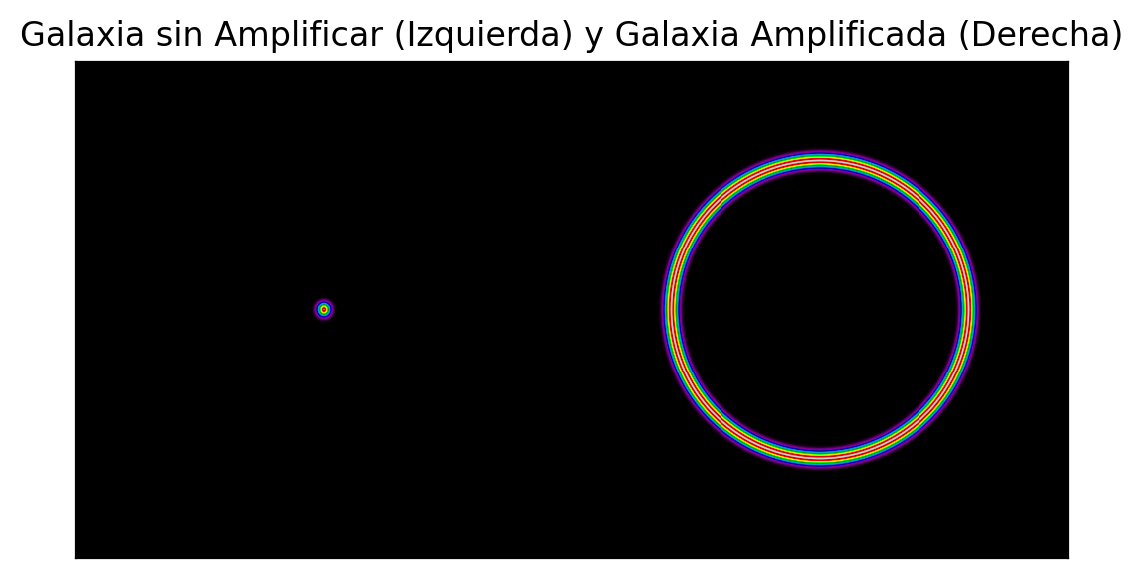

In [ ]:
# Las siguientes líneas trazarán las imágenes sin lentes y con lentes una al lado de la otra.
gpar1 = np.asarray([5, 0.25, 0, 0, 1, 0])
lpar1 = np.asarray([1.5, 0, 0, 1, 0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)

# Reproduce las imágenes.
#  Crea el widget interactivo.
def f(g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa, l_amp, l_xcen, l_ycen, l_axrat, l_pa):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('Galaxia sin Amplificar (Izquierda) y Galaxia Amplificada (Derecha)')
    ax.set_xticks([])
    ax.set_yticks([])
    gpar1 = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
    lpar1 = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
    g_image1 = ldf.gauss_2d(x, y, gpar1)
    (xg1, yg1) = ldf.sie_grad(x, y, lpar1)
    g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
    plt.imshow(np.hstack((g_image1, g_lensimage1)), **myargs)

g_amp = FloatSlider(value=5, min=0, max=10, step=0.01, continuous_update=False, layout=layout)
g_sig = FloatSlider(value=0.25, min=0, max=0.5, step=0.01, continuous_update=False, layout=layout)
g_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
g_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
l_amp = FloatSlider(value=1.5, min=0, max=2, step=0.01, continuous_update=False, layout=layout)
l_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
l_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
plot3 = interactive(f, g_amp=g_amp, g_sig=g_sig, g_xcen=g_xcen, g_ycen=g_ycen, g_axrat=g_axrat, g_pa=g_pa,
            l_amp=l_amp, l_xcen=l_xcen, l_ycen=l_ycen, l_axrat=l_axrat, l_pa=l_pa)
plot3.layout = box_layout
display(plot3)

___

## Parte 3.2: Galaxias Amplificadas Reales

Ahora que has reproducido con éxito algunas o todas las imágenes anteriores, es hora de probarlo con algunas galaxias amplificadas reales. A continuación se muestran varias galaxias reales. Su objetivo es elegir una galaxia a continuación e intentar ajustar los parámetros para que coincidan con la imagen (la galaxia Amplificada). ¡Buena suerte! Recuerda que, si cambias el valor del parámetro `cmap` en la primera celda de abajo a algo como `cm.magma`, `cm.inferno`, `cm.hot`, o `cm.Blues`, podría causar un efecto visual útil.

Para tu comodidad, te recordamos nuevamente los parámetros:

```python
gpar = [g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa]
```

Donde los parámetros de Pat se definen como:

>`g_amp` es el valor de brillo máximo.  
>`g_sig` es cuán extendido es Pat.  
>`g_xcen` es la posición x del centro de Pat.   
>`g_ycen` es la posición y del centro de Pat.  
>`g_axrat` es la razón entre el eje menor y el mayor.  
>`g_pa` es el ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x.



```python
lpar = [l_amp, l_xcen, l_ycen, l_axrat, l_pa]
```

Donde los parámetros de Chris se definen como:

>`l_amp` es el radio de Einstein de Chris.  
>`l_xcen` es la posición x del centro de Chris.  
>`l_ycen` es la posición y del centro de Chris.  
>`l_axrat` es la razón entre el eje menor y el mayor.  
>`l_pa` es el ángulo de posición del eje mayor [grados] en el sentido opuesto a las agujas del reloj en el eje x.

Los valores deben estar entre los siguientes rangos:


>$0 \le$ `l_amp` $\le 10$  
>$-1 \le$ `l_xcen` $\le 1$  
>$-1 \le$ `l_ycen` $\le 1$  
>$0 \le$ `l_axrat` $\le 1$  
>$0 \le$ `l_pa` $\le 180$


<img src = 'https://github.com/astro-datalab/notebooks-latest/blob/master/06_EPO/e-TeenAstronomyCafe/05_Gravitational_Lensing/Figures/real_galaxies.png?raw=1'>

In [ ]:
# Puedes modificar el último parámetro para cambiar el color del mapa.
myargs = {'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.magma}

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='g_amp', layout=Layout(width…

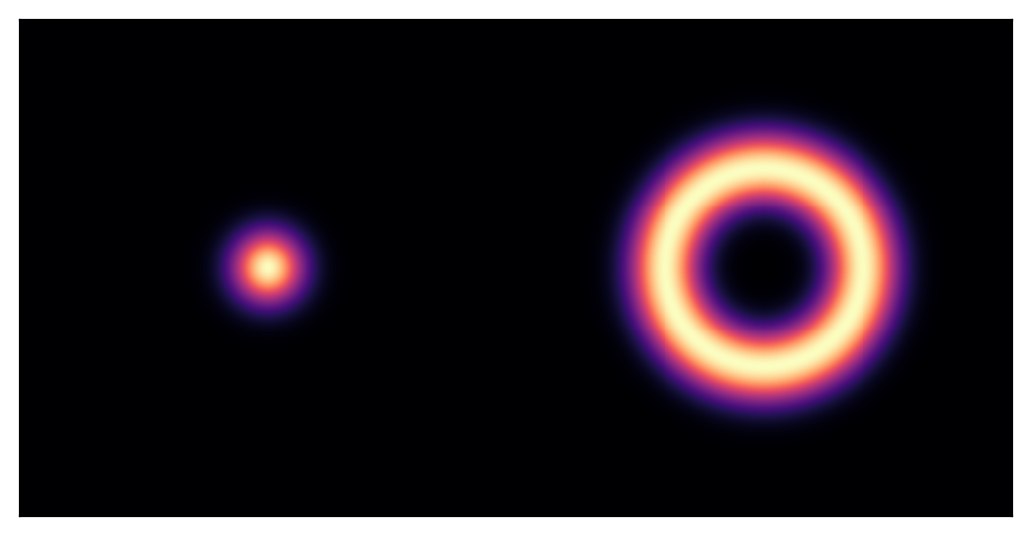

In [ ]:
# Las siguientes líneas trazarán las imágenes sin lentes y con lentes una al lado de la otra.
gpar1 = np.asarray([5, 0.25, 0, 0, 1, 0])
lpar1 = np.asarray([1, 0, 0, 1, 0])
g_image1 = ldf.gauss_2d(x, y, gpar1)
(xg1, yg1) = ldf.sie_grad(x, y, lpar1)
g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)

#  Crea el widget interactivo.
def f(g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa, l_amp, l_xcen, l_ycen, l_axrat, l_pa):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticks([])
    ax.set_yticks([])
    gpar1 = np.asarray([g_amp, g_sig, g_xcen, g_ycen, g_axrat, g_pa])
    lpar1 = np.asarray([l_amp, l_xcen, l_ycen, l_axrat, l_pa])
    g_image1 = ldf.gauss_2d(x, y, gpar1)
    (xg1, yg1) = ldf.sie_grad(x, y, lpar1)
    g_lensimage1 = ldf.gauss_2d(x-xg1, y-yg1, gpar1)
    plt.imshow(np.hstack((g_image1, g_lensimage1)), **myargs)

g_amp = FloatSlider(value=5, min=0, max=10, step=0.01, continuous_update=False, layout=layout)
g_sig = FloatSlider(value=0.25, min=0, max=0.5, step=0.01, continuous_update=False, layout=layout)
g_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
g_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
g_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
l_amp = FloatSlider(value=1, min=0, max=2, step=0.01, continuous_update=False, layout=layout)
l_xcen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_ycen = FloatSlider(value=0, min=-1, max=1, step=0.01, continuous_update=False, layout=layout)
l_axrat = FloatSlider(value=1, min=0.01, max=1, step=0.01, continuous_update=False, layout=layout)
l_pa = FloatSlider(value=0, min=0, max=180, step=0.01, continuous_update=False, layout=layout)
plot4 = interactive(f, g_amp=g_amp, g_sig=g_sig, g_xcen=g_xcen, g_ycen=g_ycen, g_axrat=g_axrat, g_pa=g_pa,
            l_amp=l_amp, l_xcen=l_xcen, l_ycen=l_ycen, l_axrat=l_axrat, l_pa=l_pa)
plot4.layout = box_layout
display(plot4)

___

## Parte 3.3: Relación radio de Einstein con la masa de las galaxias

Como se indicó anteriormente, el radio de Einstein nos da la capacidad de medir la masa de la galaxia lente. Los parámetros con los que hemos jugado están relacionados con la geometría entre las dos galaxias y nosotros y con el radio de Einstein en particular. Al optimizar los parámetros en las últimas dos actividades, calculaste el valor estimativo del radio de Einstein. Sabiendo esto y si tuviéramos las diversas distancias involucradas, se podría usar la siguiente fórmula para encontrar la masa de la galaxia lente.

\\

$$ \theta_1 = \sqrt{\frac{4GM}{c^2}\frac{D_{LS}}{D_LD_S}} $$

En la ecuación anterior:

>$\theta_1$ es el radio de Einstein   
>$c$ es la velocidad de la luz.  
>$G$ es la Constante Gravitacional.  
>$M$ es la masa de la galaxia Lente (Chris).  
>$D_L$ es la distancia a la galaxia Lente (Chris).  
>$D_S$ es la distancia a la galaxia Amplificada (Pat).  
>$D_{LS}$ es la distancia desde la galaxia Amplificada (Pat) a la galaxia Lente (Chris).

Las distancias a estas galaxias están determinadas por los respectivos espectros desplazados hacia el rojo de las galaxias.

En el siguiente diagrama, el radio de Einstein está dado por $\theta_1$.

<img src = "https://raw.githubusercontent.com/astro-datalab/notebooks-latest/master/06_EPO/e-TeenAstronomyCafe/05_Gravitational_Lensing/Figures/Einstein_radius.png" width = 400 height = 400>

<img src = "https://raw.githubusercontent.com/astro-datalab/notebooks-latest/master/06_EPO/e-TeenAstronomyCafe/05_Gravitational_Lensing/Figures/grav_lens.png" style = " background: white">


Lamentablemente, en este kit no contamos con las distancias a las galaxias por lo cual no podemos calcular la masa de cada una de ellas.
___

_**Este cuaderno de Jupyter fue escrito por A. Bolton, 2017**_

_**Actualizado el 2018 por: Elliot Kisiel y Connie Walker**_

_**Revisado por Andres Jaramillo**_

_**Traducido por Fernanda Urrutia, 2023**_